In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import time
import xarray as xr

In [2]:
airtemps = xr.tutorial.open_dataset('air_temperature')

In [3]:
airtemps

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [7]:
means=airtemps.mean(dim=('lat','lon')) #axis=(0,1) lat,lon

In [8]:
means

<xarray.Dataset>
Dimensions:  (time: 2920)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time) float32 274.16626 273.5202 273.23352 ... 273.0445 273.41498

In [13]:
m=means['air'].values

In [27]:
#norm
def standard(x):
    a = np.where(x>0, x, np.nan)
    return x/np.mean(a)


In [28]:
s =airtemps.apply(standard)
s

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 0.85758436 0.8622065 ... 1.051323

In [16]:
# np.divide(airtemps.air,m)

SyntaxError: invalid syntax (<ipython-input-16-a8f90c624b6b>, line 1)

In [29]:
sv=s.air.var(dim='time')
sv

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[1.74445857e-03, 1.72871992e-03, 1.73005648e-03, ...,
        1.43879617e-03, 1.46690081e-03, 1.50040467e-03],
       [1.71789678e-03, 1.72904192e-03, 1.75502442e-03, ...,
        1.50494708e-03, 1.54820026e-03, 1.53634895e-03],
       [1.95459230e-03, 2.05804314e-03, 2.16215383e-03, ...,
        1.61611999e-03, 1.52344489e-03, 1.34858151e-03],
       ...,
       [3.26405097e-05, 3.05823887e-05, 2.71756689e-05, ...,
        3.99617820e-05, 4.38454226e-05, 4.80466770e-05],
       [2.15185955e-05, 2.03873369e-05, 1.98484304e-05, ...,
        3.91841386e-05, 4.61908348e-05, 5.25332471e-05],
       [1.35725795e-05, 1.39031226e-05, 1.36102080e-05, ...,
        3.88814587e-05, 4.31922599e-05, 4.68644212e-05]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

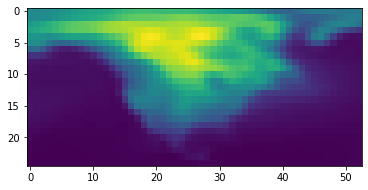

In [23]:
plt.imshow(sv)